# Laboratorio 1
### Deep learning - Javier Fong
- Adrian Rodriguez 21691
- Daniel Gomez 21429

In [93]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt

In [94]:
# Funcion de activacion 
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [95]:
# Inicializacion de los parametros 
def initialize_parameters(n_x, n_h, n_y):
    W1 = np.random.randn(n_h, n_x)
    b1 = np.random.randn(n_h, 1)
    W2 = np.random.randn(n_y, n_h)
    b2 = np.random.randn(n_y, 1)
    
    parameters = {
        "W1": W1,
        "b1" : b1,
        "W2": W2,
        "b2" : b2
    }
    return parameters


In [96]:
def forward_prop(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = {
        "A1": A1,
        "A2": A2
    }
    return A2, cache

In [97]:
# Funcion de perdida
def loss_function(A2, Y):
    cost = -np.sum(np.multiply(Y, np.log(A2)) +  np.multiply(1-Y, np.log(1-A2)))/m
    cost = np.squeeze(cost)

    return cost

def loss_function_mse(A2, Y):
    cost = np.sum((A2 - Y)**2)
    cost = np.squeeze(cost)

    return cost

In [98]:
def backward_prop(X, Y, cache, parameters):
    A1 = cache["A1"]
    A2 = cache["A2"]

    W2 = parameters["W2"]

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis=1, keepdims=True)/m
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1-np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T)/m
    db1 = np.sum(dZ1, axis=1, keepdims=True)/m

    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }

    return grads

In [99]:
def update_parameters(parameters, grads, learning_rate):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    new_parameters = {
        "W1": W1,
        "W2": W2,
        "b1" : b1,
        "b2" : b2
    }

    return new_parameters

In [100]:
def model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate):
    parameters = initialize_parameters(n_x, n_h, n_y)
    costs = []

    for i in range(0, num_of_iters + 1):
        a2, cache = forward_prop(X, parameters)

        cost = loss_function_mse(a2, Y)
        costs.append(cost)

        grads = backward_prop(X, Y, cache, parameters)

        parameters = update_parameters(parameters, grads, learning_rate)

        if i % 100 == 0:
            print("Cost after iteration# {:d}: {:f}".format(i, cost))

    return parameters, costs

In [101]:
def predict(X, parameters):
    a2, cache = forward_prop(X, parameters)
    yhat = a2
    yhat = np.squeeze(yhat)
    if(yhat >= 0.5):
        y_predict = 1
    else:
        y_predict = 0

    return y_predict

Training with learning rate: 0.5
Cost after iteration# 0: 1.430116
Cost after iteration# 100: 1.001532
Cost after iteration# 200: 0.999833
Cost after iteration# 300: 0.999000
Cost after iteration# 400: 0.997563
Cost after iteration# 500: 0.992029
Cost after iteration# 600: 0.731786
Cost after iteration# 700: 0.538106
Cost after iteration# 800: 0.516604
Cost after iteration# 900: 0.510411
Cost after iteration# 1000: 0.507539
Neural Network prediction for example (1, 1) with learning rate 0.50 is 1
Training with learning rate: 0.1
Cost after iteration# 0: 1.473839
Cost after iteration# 100: 0.963252
Cost after iteration# 200: 0.877782
Cost after iteration# 300: 0.810508
Cost after iteration# 400: 0.765643
Cost after iteration# 500: 0.736168
Cost after iteration# 600: 0.715450
Cost after iteration# 700: 0.698383
Cost after iteration# 800: 0.677135
Cost after iteration# 900: 0.590701
Cost after iteration# 1000: 0.333922
Neural Network prediction for example (1, 1) with learning rate 0.10 i

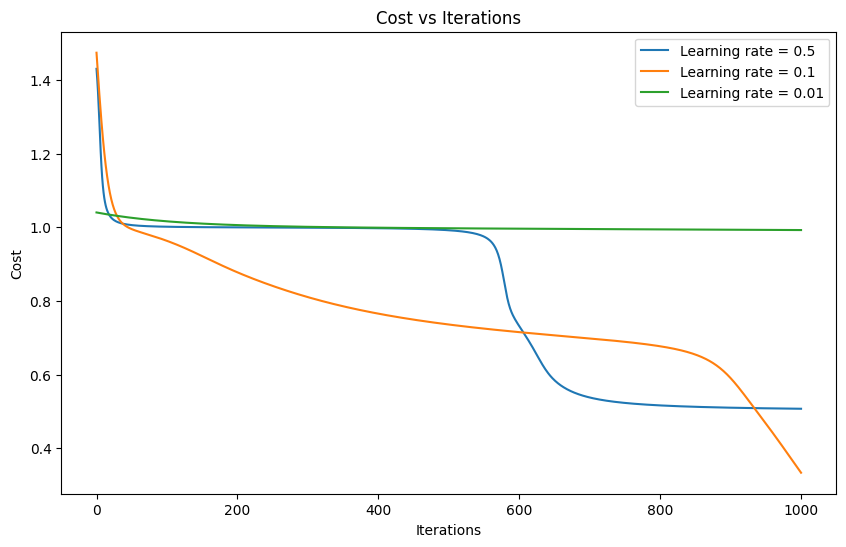

In [102]:
np.random.seed(2)

# The 4 training examples by columns
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])

# The outputs of the XOR for every example in X
Y = np.array([[0, 1, 1, 0]])

# No. of training examples
m = X.shape[1]

# Set the hyperparameters
n_x = 2  # No. of neurons in first layer
n_h = 2  # No. of neurons in hidden layer
n_y = 1  # No. of neurons in output layer
num_of_iters = 1000
learning_rates = [0.5, 0.1, 0.01]

# Dictionary to store costs for each learning rate
costs_dict = {}

for lr in learning_rates:
    print(f"Training with learning rate: {lr}")
    trained_parameters, costs = model(X, Y, n_x, n_h, n_y, num_of_iters, lr)
    costs_dict[lr] = costs

    # Test 2X1 vector to calculate the XOR of its elements.
    # Try (0, 0), (0, 1), (1, 0), (1, 1)
    X_test = np.array([[1], [1]])

    y_predict = predict(X_test, trained_parameters)

    print(
        "Neural Network prediction for example ({:d}, {:d}) with learning rate {:.2f} is {:d}".format(
            X_test[0][0], X_test[1][0], lr, y_predict
        )
    )

# Plotting the cost vs iterations for each learning rate
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(costs_dict[lr], label=f"Learning rate = {lr}")

plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.legend()
plt.show()

In [103]:
def loss_function_mse(A2, Y):
    difference = A2 - Y # real-predictied value difference
    sqr_difference = np.square(difference) # square the difference
    mse = np.mean(sqr_difference) # mean of the squared difference
    return mse

def backward_prop(X, Y, cache, parameters):
    A1 = cache["A1"]
    A2 = cache["A2"]

    W2 = parameters["W2"]

    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis=1, keepdims=True)/m
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1-np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T)/m
    db1 = np.sum(dZ1, axis=1, keepdims=True)/m

    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }

    return grads

def backward_prop_mse(X, Y, cache, parameters):
    A1 = cache["A1"]
    A2 = cache["A2"]

    W2 = parameters["W2"]

    # Derivate of the loss function with respect to A2
    dZ2 = A2 - Y
    dW2 = np.dot(dZ2, A1.T)/m
    db2 = np.sum(dZ2, axis=1, keepdims=True)/m
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1-np.power(A1, 2))
    dW1 = np.dot(dZ1, X.T)/m
    db1 = np.sum(dZ1, axis=1, keepdims=True)/m

    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }

    return grads

def update_parameters(parameters, grads, learning_rate):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    new_parameters = {
        "W1": W1,
        "W2": W2,
        "b1" : b1,
        "b2" : b2
    }

    return new_parameters

def model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate):
    parameters = initialize_parameters(n_x, n_h, n_y)

    for i in range(0, num_of_iters+1):
        a2, cache = forward_prop(X, parameters)

        cost = loss_function(a2, Y)

        grads = backward_prop(X, Y, cache, parameters)

        parameters = update_parameters(parameters, grads, learning_rate)

        if(i%100 == 0):
            print('Cost after iteration no. {:d}: {:f}'.format(i, cost))

    return parameters

def predict(X, parameters):
    a2, cache = forward_prop(X, parameters)
    yhat = a2
    yhat = np.squeeze(yhat)
    if(yhat >= 0.5):
        y_predict = 1
    else:
        y_predict = 0

    return y_predict

def model_with_cost_tracking(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate, cost_function, backward_prop = backward_prop):
    parameters = initialize_parameters(n_x, n_h, n_y)
    costs = []

    for i in range(0, num_of_iters + 1):
        a2, cache = forward_prop(X, parameters)
        
        cost = cost_function(a2, Y)
        costs.append(cost)
        
        grads = backward_prop(X, Y, cache, parameters)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if i % 100 == 0:
            print(f'Cost after iteration# {i}: {cost}')
    
    return parameters, costs



Learning rate: 0.01
Cost after iteration# 0: 0.8140596992628906
Cost after iteration# 100: 0.7351306280381168
Cost after iteration# 200: 0.7005532101167495
Cost after iteration# 300: 0.6833479966695151
Cost after iteration# 400: 0.6727025566861571
Cost after iteration# 500: 0.6647557526999209
Cost after iteration# 600: 0.658135421607147
Cost after iteration# 700: 0.6523082073775175
Cost after iteration# 800: 0.6470276308663352
Cost after iteration# 900: 0.6421563195843621
Cost after iteration# 1000: 0.6376072929967797

Learning rate: 0.1
Cost after iteration# 0: 1.8419514524334266
Cost after iteration# 100: 0.5930826055828388
Cost after iteration# 200: 0.49321271949012363
Cost after iteration# 300: 0.3336353094869125
Cost after iteration# 400: 0.20082910508062982
Cost after iteration# 500: 0.134093584111044
Cost after iteration# 600: 0.0985642065846527
Cost after iteration# 700: 0.07720232078475141
Cost after iteration# 800: 0.06313489089445097
Cost after iteration# 900: 0.05324362194

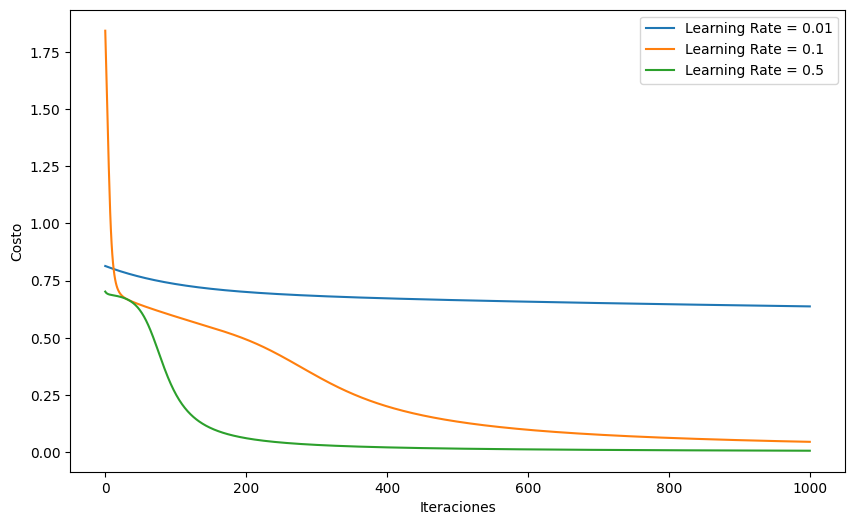

Cost after iteration no. 0: 1.052558
Cost after iteration no. 100: 0.695402
Cost after iteration no. 200: 0.693668
Cost after iteration no. 300: 0.693206
Cost after iteration no. 400: 0.692966
Cost after iteration no. 500: 0.692779
Cost after iteration no. 600: 0.692587
Cost after iteration no. 700: 0.692352
Cost after iteration no. 800: 0.692030
Cost after iteration no. 900: 0.691539
Cost after iteration no. 1000: 0.690679
{'W1': array([[-0.59247105, -0.47282144],
       [-2.06763357, -0.23592616]]), 'W2': array([[-0.43995116, -0.16049007]]), 'b1': array([[-1.50109455],
       [-1.77729809]]), 'b2': array([[-0.56827845]])}
Neural Network prediction for example (1, 1) is 1


In [104]:
# Definir diferentes learning rates
learning_rates = [0.01, 0.1, 0.5]
costs_dict = {}

for lr in learning_rates:
    print(f"\nLearning rate: {lr}")
    _, costs = model_with_cost_tracking(X, Y, n_x, n_h, n_y, num_of_iters, lr, loss_function)
    costs_dict[lr] = costs

# Graficar costos
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(costs_dict[lr], label=f'Learning Rate = {lr}')
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.legend()
plt.show()

np.random.seed(2)

# The 4 training examples by columns
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])

# The outputs of the XOR for every example in X
Y = np.array([[0, 1, 1, 0]])

# No. of training examples
m = X.shape[1]

# Set the hyperparameters
n_x = 2     #No. of neurons in first layer
n_h = 2     #No. of neurons in hidden layer
n_y = 1     #No. of neurons in output layer
num_of_iters = 1000
learning_rate = 0.3

trained_parameters = model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate)

# Test 2X1 vector to calculate the XOR of its elements. 
# Try (0, 0), (0, 1), (1, 0), (1, 1)
X_test = np.array([[1], [1]])

print(trained_parameters)

y_predict = predict(X_test, trained_parameters)

print('Neural Network prediction for example ({:d}, {:d}) is {:d}'.format(
    X_test[0][0], X_test[1][0], y_predict))

In [105]:
def initialize_parameters_zeros(n_x, n_h, n_y):
    W1 = np.zeros((n_h, n_x))
    b1 = np.zeros((n_h, 1))
    W2 = np.zeros((n_y, n_h))
    b2 = np.zeros((n_y, 1))
    
    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2
    }
    return parameters

# Probar inicialización en 0
parameters_zeros = initialize_parameters_zeros(n_x, n_h, n_y)
trained_parameters_zeros = model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate)

Cost after iteration no. 0: 1.013592
Cost after iteration no. 100: 0.590854
Cost after iteration no. 200: 0.525336
Cost after iteration no. 300: 0.464032
Cost after iteration no. 400: 0.132533
Cost after iteration no. 500: 0.062978
Cost after iteration no. 600: 0.040478
Cost after iteration no. 700: 0.029604
Cost after iteration no. 800: 0.023256
Cost after iteration no. 900: 0.019114
Cost after iteration no. 1000: 0.016207


In [106]:
# comparing convergence
print(f"0 initialized paremeres: {trained_parameters_zeros}")
print(f"\nRandom initialized parameters: {trained_parameters}")

0 initialized paremeres: {'W1': array([[-2.92684964,  3.09007586],
       [ 3.65689327, -3.64943032]]), 'W2': array([[-4.72800176, -4.657755  ]]), 'b1': array([[1.37578737],
       [1.80261412]]), 'b2': array([[4.16176135]])}

Random initialized parameters: {'W1': array([[-0.59247105, -0.47282144],
       [-2.06763357, -0.23592616]]), 'W2': array([[-0.43995116, -0.16049007]]), 'b1': array([[-1.50109455],
       [-1.77729809]]), 'b2': array([[-0.56827845]])}


In [107]:
def model_with_cost_tracking(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate, cost_function, backward_prop = backward_prop):
    parameters = initialize_parameters(n_x, n_h, n_y)
    costs = []

    for i in range(0, num_of_iters + 1):
        a2, cache = forward_prop(X, parameters)
        
        cost = cost_function(a2, Y)
        costs.append(cost)
        
        grads = backward_prop(X, Y, cache, parameters)
        
        parameters = update_parameters(parameters, grads, learning_rate)
        
        if i % 100 == 0:
            print(f'Cost after iteration# {i}: {cost}')
    
    return parameters, costs


Entrenando con learning rate = 0.01
Cost after iteration# 0: 0.7138661657957408
Cost after iteration# 100: 0.7013407397261048
Cost after iteration# 200: 0.6960972715965046
Cost after iteration# 300: 0.6937558759018435
Cost after iteration# 400: 0.6925569470116966
Cost after iteration# 500: 0.6918089880061365
Cost after iteration# 600: 0.6912420356221645
Cost after iteration# 700: 0.6907501329161762
Cost after iteration# 800: 0.6902907751621409
Cost after iteration# 900: 0.6898459797494001
Cost after iteration# 1000: 0.689407254139871

Entrenando con learning rate = 0.1
Cost after iteration# 0: 0.8140596992628906
Cost after iteration# 100: 0.637562280104843
Cost after iteration# 200: 0.6022635684933371
Cost after iteration# 300: 0.5774949046395388
Cost after iteration# 400: 0.5592778651416046
Cost after iteration# 500: 0.5456979806681578
Cost after iteration# 600: 0.535411292386223
Cost after iteration# 700: 0.5274604470046982
Cost after iteration# 800: 0.521180478841919
Cost after ite

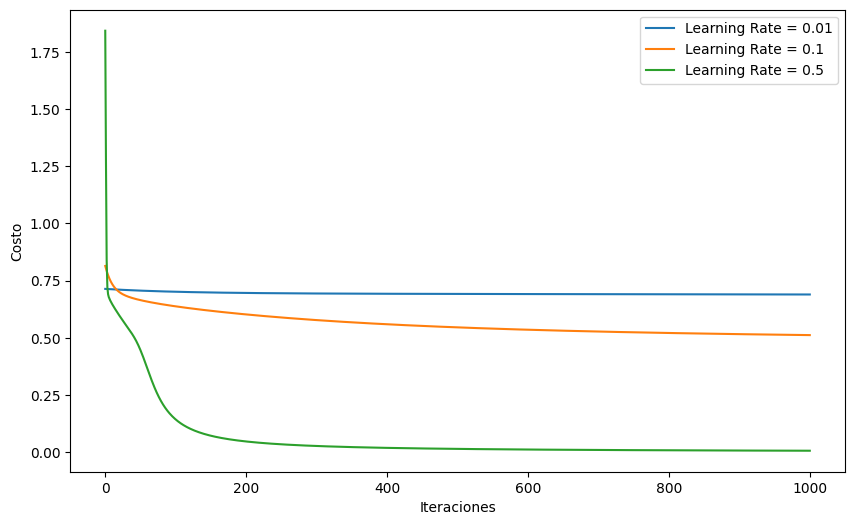

In [108]:
# Definir diferentes learning rates
learning_rates = [0.01, 0.1, 0.5]
costs_dict = {}

for lr in learning_rates:
    print(f"\nEntrenando con learning rate = {lr}")
    _, costs = model_with_cost_tracking(X, Y, n_x, n_h, n_y, num_of_iters, lr, loss_function)
    costs_dict[lr] = costs

# Graficar costos
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(costs_dict[lr], label=f'Learning Rate = {lr}')
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.legend()
plt.show()


Learning rate: 0.01
Cost after iteration# 0: 0.2545457301296162
Cost after iteration# 100: 0.2511548538169305
Cost after iteration# 200: 0.24934072506070076
Cost after iteration# 300: 0.24825312220596177
Cost after iteration# 400: 0.24749337825079382
Cost after iteration# 500: 0.24686983953471553


Cost after iteration# 600: 0.24628712680960813
Cost after iteration# 700: 0.2456950143098632
Cost after iteration# 800: 0.24506438347123638
Cost after iteration# 900: 0.24437571553834325
Cost after iteration# 1000: 0.24361348550589873

Learning rate: 0.1
Cost after iteration# 0: 0.26169880180635346
Cost after iteration# 100: 0.2510900551654119
Cost after iteration# 200: 0.24813810924537635
Cost after iteration# 300: 0.24222399777450132
Cost after iteration# 400: 0.228077777894997
Cost after iteration# 500: 0.2067772457301129
Cost after iteration# 600: 0.1892028855985216
Cost after iteration# 700: 0.1765733867871946
Cost after iteration# 800: 0.16191648946187748
Cost after iteration# 900: 0.14877446839245168
Cost after iteration# 1000: 0.14098477250800498

Learning rate: 0.5
Cost after iteration# 0: 0.24715609248313908
Cost after iteration# 100: 0.01650398252431903
Cost after iteration# 200: 0.00230426001617102
Cost after iteration# 300: 0.0008121078870531399
Cost after iteration# 400:

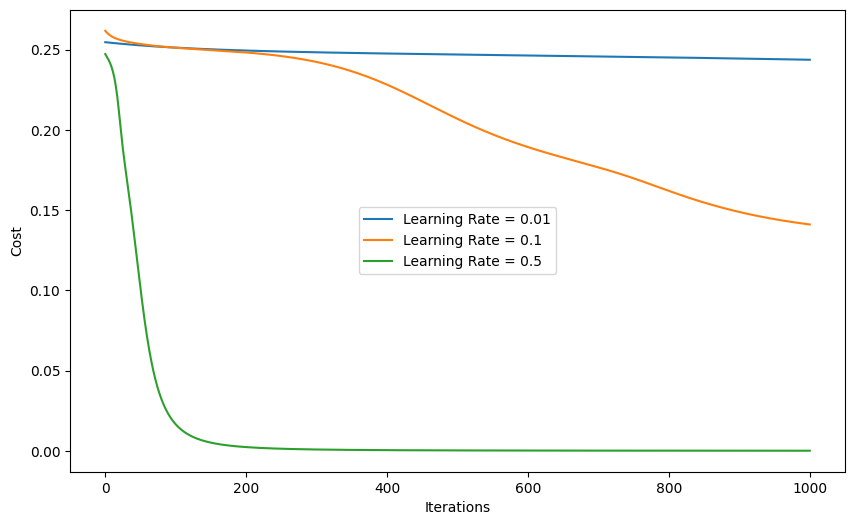

In [109]:
# Definir diferentes learning rates
learning_rates = [0.01, 0.1, 0.5]
costs_dict = {}

for lr in learning_rates:
    print(f"\nLearning rate: {lr}")
    _, costs = model_with_cost_tracking(X, Y, n_x, n_h, n_y, num_of_iters, lr, loss_function_mse, backward_prop_mse)
    costs_dict[lr] = costs

# Graficar costos
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(costs_dict[lr], label=f'Learning Rate = {lr}')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.show()

Loss function with cross-entropy
Cost after iteration no. 0: 1.323652
Cost after iteration no. 100: 0.506392
Cost after iteration no. 200: 0.454822
Cost after iteration no. 300: 0.385143
Cost after iteration no. 400: 0.369283
Cost after iteration no. 500: 0.362434
Cost after iteration no. 600: 0.358661
Cost after iteration no. 700: 0.356295
Cost after iteration no. 800: 0.354681
Cost after iteration no. 900: 0.353514
Cost after iteration no. 1000: 0.352634
Loss function with MSE
Cost after iteration# 0: 0.25604509995521985
Cost after iteration# 100: 0.19591510934673165
Cost after iteration# 200: 0.0377979540988487
Cost after iteration# 300: 0.006730816996791493
Cost after iteration# 400: 0.002431378507950358
Cost after iteration# 500: 0.0012083596149940349
Cost after iteration# 600: 0.0007125762367045774
Cost after iteration# 700: 0.0004668317680963457
Cost after iteration# 800: 0.0003282936527403004
Cost after iteration# 900: 0.00024290500294445595
Cost after iteration# 1000: 0.000186

<Figure size 1000x600 with 0 Axes>

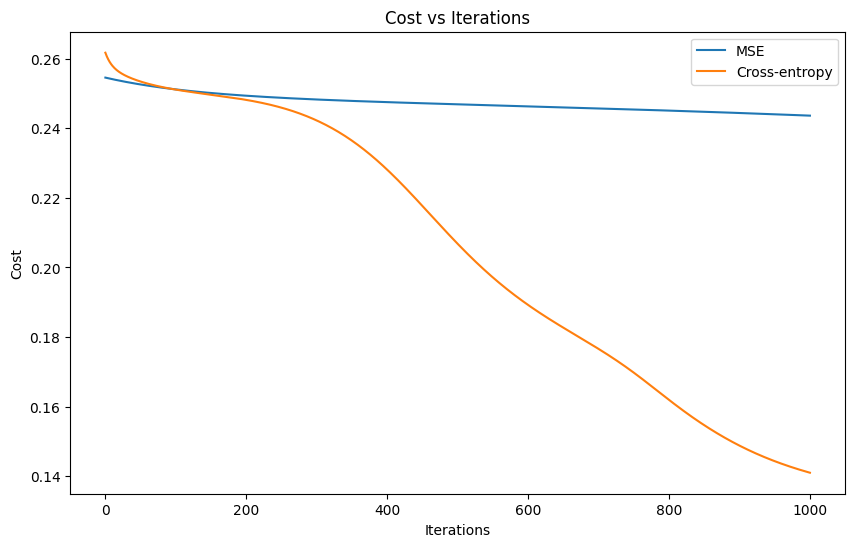

In [119]:
# Compare both loss functions
print("Loss function with cross-entropy")
trained_parameters_ce = model(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate)
print("Loss function with MSE")
trained_parameters_mse = model_with_cost_tracking(X, Y, n_x, n_h, n_y, num_of_iters, learning_rate, loss_function_mse, backward_prop_mse)[0]

# Test 2X1 vector to calculate the XOR of its elements.
plt.figure(figsize=(10, 6))
X_test = np.array([[1], [1]])
y_predict = predict(X_test, trained_parameters_ce)
print(f"Neural Network prediction for example ({X_test[0][0]}, {X_test[1][0]}) with cross-entropy loss is {y_predict}")
y_predict = predict(X_test, trained_parameters_mse)
print(f"Neural Network prediction for example ({X_test[0][0]}, {X_test[1][0]}) with MSE loss is {y_predict}")

# Plotting the cost vs iterations for each learning rate
plt.figure(figsize=(10, 6))
plt.plot(costs_dict[0.01], label="MSE")
plt.plot(costs_dict[0.1], label="Cross-entropy")
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")
plt.legend()
plt.show()
